# Estadísitica Aplicada
Actividad #5

Fracisco Humberto Villegas Reyna 1731722 Gpo43

3.- En el enlace se encuentra la base de datos “quiebra.csv” que mide los años
que tarda en quebrar una empresa (desde que se crea hasta que quiebra), la
variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada
(no se observó la quiebra en el periodo de observación). La variable mujer toma
valores de 0 si el fundador de la empresa es hombre y 1 si el fundador de la
empresa es mujer. La variable tiempo mide los años que tardo en quebrar la
empresa. Responda en una notebook de Python cada inciso.
raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFMUANL/main/bases_datos/quiebra.csv

In [126]:
#librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
# librerias especializadas
from lifelines import ExponentialFitter
from lifelines import KaplanMeierFitter
from lifelines import WeibullFitter
from lifelines.statistics import logrank_test
from lifelines import LogNormalFitter

In [128]:
## importar los datos 
quiebra=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [129]:
quiebra.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


In [130]:
# inciso a. Ajuste un modelo de superviviencia exponencial
quiebra_ex=ExponentialFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

In [131]:
quiebra_ex.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


Text(0, 0.5, '$h(t)$')

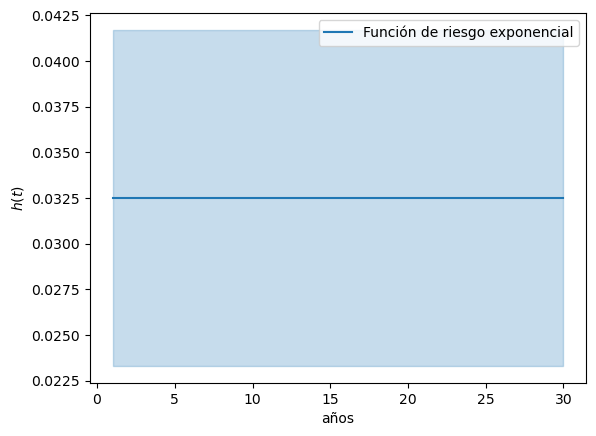

In [132]:
# inciso b. Grafique la función de riesgo exponencial
quiebra_ex.plot_hazard(label='Función de riesgo exponencial');
plt.xlabel('años')
plt.ylabel('$h(t)$')


inciso c. ¿Cuál es el riesgo de que una empresa quiebre según la función exponencial?
Es de 0.032498 o el 3.25% el riesgo que una empresa quiebre por medio de la fucnion exponencial.

4.- Con la base de datos del punto 3 responda en la misma notebook lo
siguiente:

In [133]:
# a. Ajuste un modelo Weibull de superviviencia
quiebra_weibull=WeibullFitter().fit(quiebra['tiempo'],quiebra['quebrar'])


Text(0, 0.5, '$h(t)$')

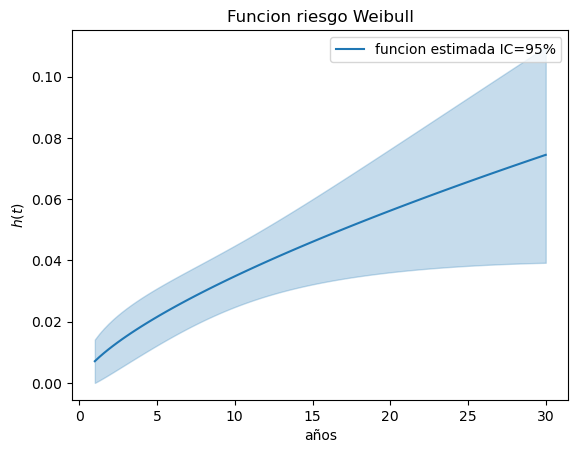

In [134]:
# b. Grafique la funcion de riesgo
quiebra_weibull.plot_hazard(label='funcion estimada IC=95%')
plt.title('Funcion riesgo Weibull')
plt.xlabel('años')
plt.ylabel('$h(t)$')

inciso c. ¿Que forma tiene la funcion de riesgo?¿qué signfica?
Es una parabola creciente que significa que entre mas años tenga la empresa mayor es el riesgo de quebrar

**5.- Con la base de datos del punto 3 responda en la misma notebook lo
siguiente:**

In [135]:
# Inciso A. Ajuste un modelo Log normal
quiebra_logn=LogNormalFitter().fit(quiebra['tiempo'],quiebra['quebrar'])



Text(0, 0.5, '$h(t)$')

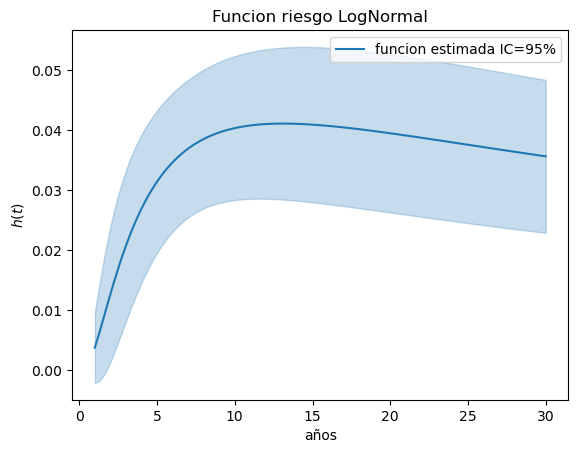

In [136]:
# Inciso B. Grafique la funcion de riesgo
quiebra_logn.plot_hazard(label='funcion estimada IC=95%')
plt.title('Funcion riesgo LogNormal')
plt.xlabel('años')
plt.ylabel('$h(t)$')

In [137]:
# Inciso c. En que periodo el riesgo de quebrar es creciente y en cuál decreciente
quiebra_logn.hazard_

,LogNormal_estimate
1.000000,0.003749
1.292929,0.006219
1.585859,0.008870
1.878788,0.011543
2.171717,0.014143
...,...
28.828283,0.036053
29.121212,0.035941
29.414141,0.035829
29.707071,0.035718


el riesgo es creciente del tiempo 1 al 13 , y es decreciente del 13 al 30

**6.- Utilizando el estimador de Kaplan-Meier realice una notebook en Python para responder lo siguiente:**


In [138]:
# Inciso A. Estime la función de supervivencia y la mediana de tiempo de supervivencia y diga que significa.
quiebrak=KaplanMeierFitter().fit(quiebra['tiempo'],quiebra['quebrar'])


Text(0, 0.5, '$\\hat{s(t)}$')

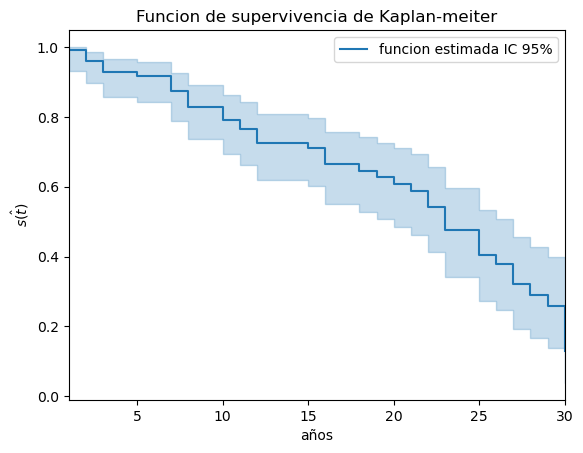

In [139]:
quiebrak.plot_survival_function(label='funcion estimada IC 95%');
plt.xlim(1,30)
plt.title('Funcion de supervivencia de Kaplan-meiter');
plt.xlabel('años')
plt.ylabel('$\hat{s(t)}$')


La mediana de tiempo de superviviencia es de 23 años, lo cual indica que la mitad de las empresas quiebran a las 23 años desde su fundación.

**Inciso b.** Estime la función de supervivencia por Kaplan-meier para hombres y
mujeres y grafique con .plot_survival_function(ci_show=False) y diga si las
empresas administradas por hombres/mujeres quiebran más rápido. No
olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

In [140]:
hombres=quiebra.query('mujer==0')
mujeres=quiebra.query('mujer==1')

In [141]:
quiebrak_hombres=KaplanMeierFitter().fit(hombres['tiempo'],hombres['quebrar'])
quiebrak_mujeres=KaplanMeierFitter().fit(mujeres['tiempo'],mujeres['quebrar'])

(1.0, 30.0)

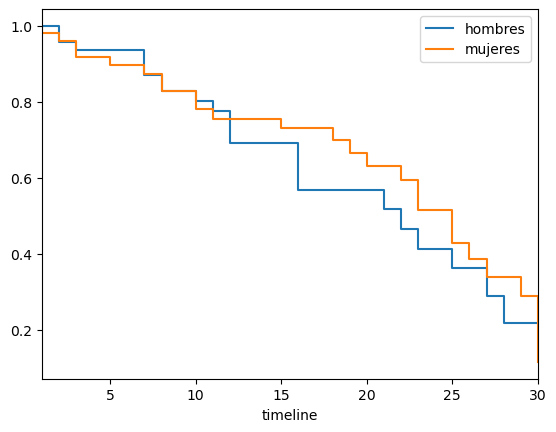

In [142]:
quiebrak_hombres.plot_survival_function(ci_show=False,label='hombres')
quiebrak_mujeres.plot_survival_function(ci_show=False, label='mujeres')
plt.xlim(1,30)

Se puede observar por medio de la gráfica conjunta que en el los negocios administrados por hombres quebraron mas rápido.

**inciso c. El profesor cree que las empresas fundadas por hombres quiebran más rápido, refute o confirme con evidencia estadística tal afirmación(pruebas de hipótesis, graficas, tablas etc.)**

prueba de hipotesis (log rank test)
 
$Ho:S(1)=S(2)$ funciones de superviviencia iguales

$Ha:S(1) \neq S(2)$ funciones de superviviencia distintas

In [146]:
evidencia=logrank_test(mujeres['tiempo'],hombres['tiempo'],mujeres['quebrar'],hombres['quebrar'])

In [147]:
evidencia.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

In [148]:
evidencia.p_value.round(2)

0.59

 $¿p-value<\alpha?$ 

 0.59<0.05

In [151]:
0.59<0.05


False

NO Rechazamos H0

In [152]:
generos=pd.get_dummies(quiebra,'mujer',drop_first=True)
generos

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1
...,...,...,...
95,12,0,1
96,22,0,1
97,30,0,0
98,10,0,0


In [153]:
p2=CoxPHFitter().fit(generos,'tiempo','quebrar')
p2.print_summary()

<lifelines.CoxPHFitter: fitted with 100 total observations, 52 right-censored observations>
             duration col = 'tiempo'
                event col = 'quebrar'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 48
   partial log-likelihood = -175.31
         time fit was run = 2023-09-20 04:29:48 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
mujer      -0.15       0.86       0.29            -0.73             0.43                 0.48                 1.53

            cmp to     z    p   -log2(p)
covariate                               
mujer         0.00 -0.51 0.61       0.71
---
Concordance = 0.52
Partial AIC = 352.62
log-likelihood ratio test = 0.26 on 1 df
-log2(p) of ll-ratio test = 0.71

No rechazamos H0, la variable "mujer" no tiene efecto sobre el riesgo de que la empresa quiebre.

In [155]:
quiebrak_hombres.median_survival_time_

22.0

In [156]:
quiebrak_mujeres.median_survival_time_

25.0

**las empresas administradas por los hombres quiebran  mas rapido que las empresas administradas por los mujeres quiebran. La mitad de las empresas administradas por los hombres quiebran terminan a los 22 años y La mitad de las empresas administradas por los mujeres quiebran terminan a los 25 años**